Clustering II - hierarchical methods

Dendrograms

In [169]:
from sklearn.datasets import make_blobs, make_moons
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Dataset

Create the dataset using make blobs function.

In [170]:
X, y_true = make_blobs(n_samples=300, centers=5,cluster_std=0.8, random_state=14)

Ex.1 Plot the data.

Text(0.5, 1.0, 'Data')

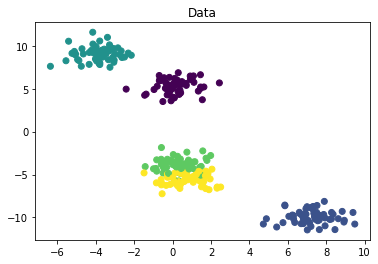

In [171]:
plt.scatter(X[:,0],X[:,1],c=y_true)
plt.title('Data')

Ex.2 Use the Means function with k=2 to assign points to clusters.

Text(0.5, 1.0, 'Clusters after prediction')

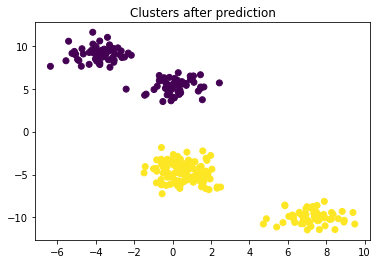

In [172]:
from sklearn.cluster import KMeans

km =KMeans(n_clusters=2,init='random')
y_pred=km.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title('Clusters after prediction')

Ex.3 Use the scipy libraries to draw the dendrogram for the data:

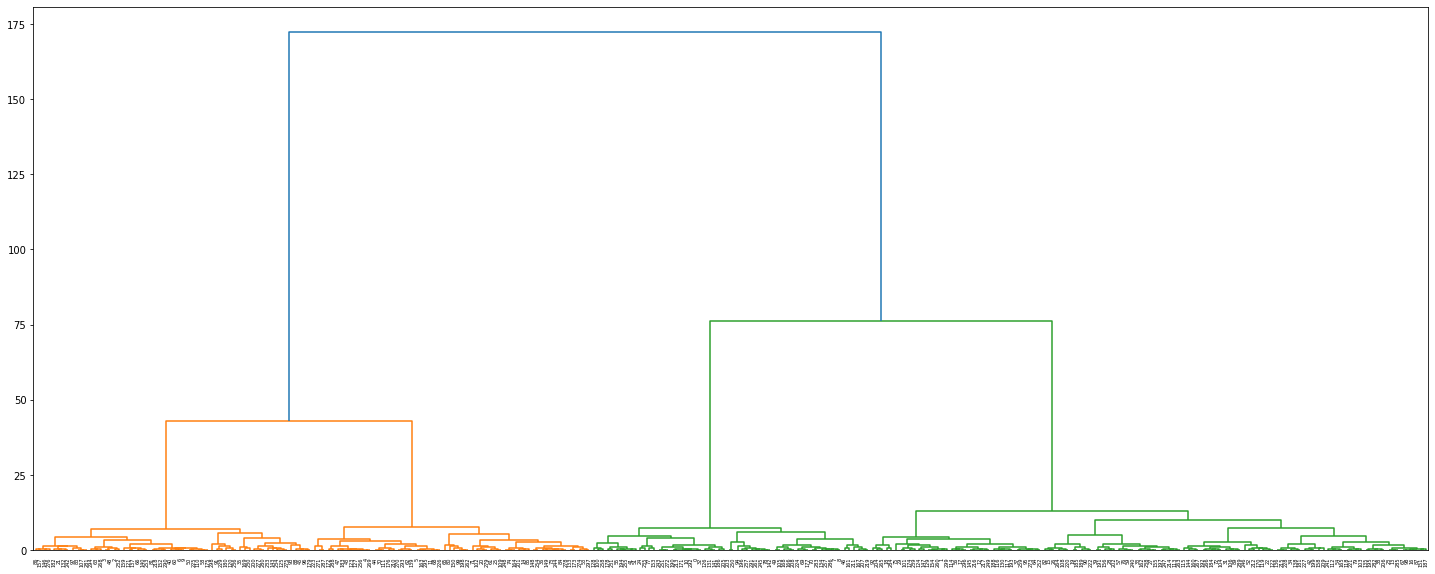

In [173]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

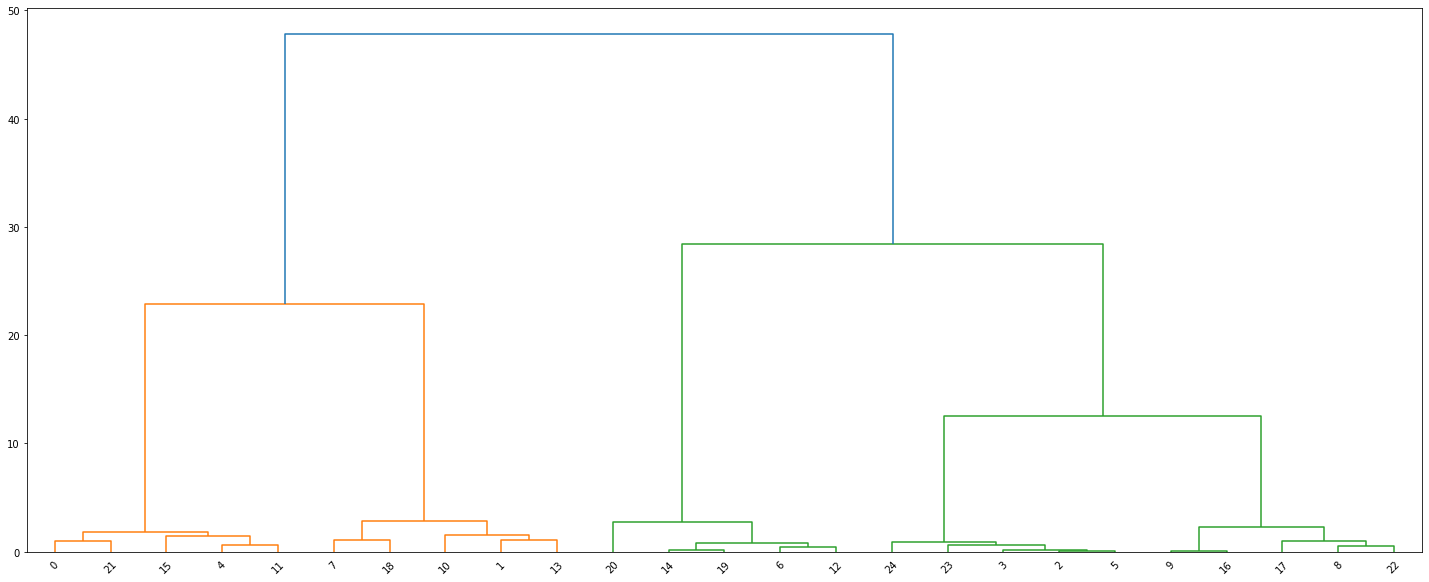

In [174]:
X, y_true = make_blobs(n_samples=25, centers=5,cluster_std=0.8, random_state=11)
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Agglomerative clustering

In [175]:
df=pd.read_csv("shopping_data.csv",sep=',')
df.head(7)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


Ex.1.Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [176]:
df=df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head(7)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6


Ex.2 Create a dendrogram to chose the appropriate k value.


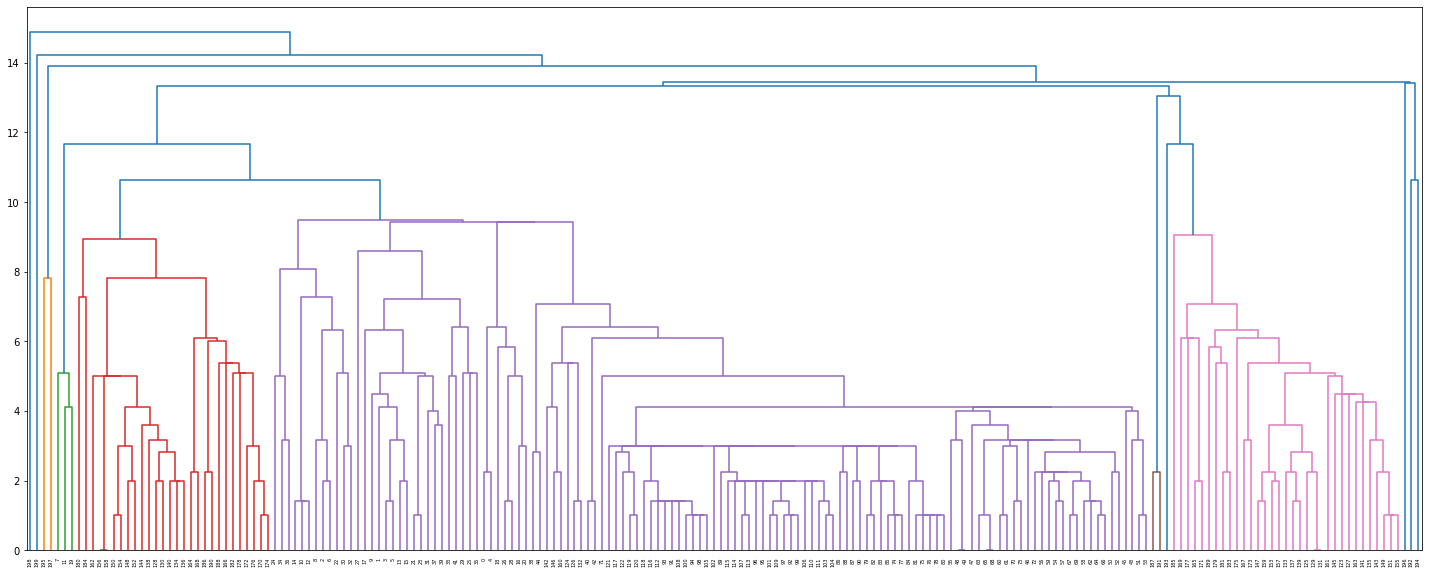

In [177]:
Z = linkage(df)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Ex.3.Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

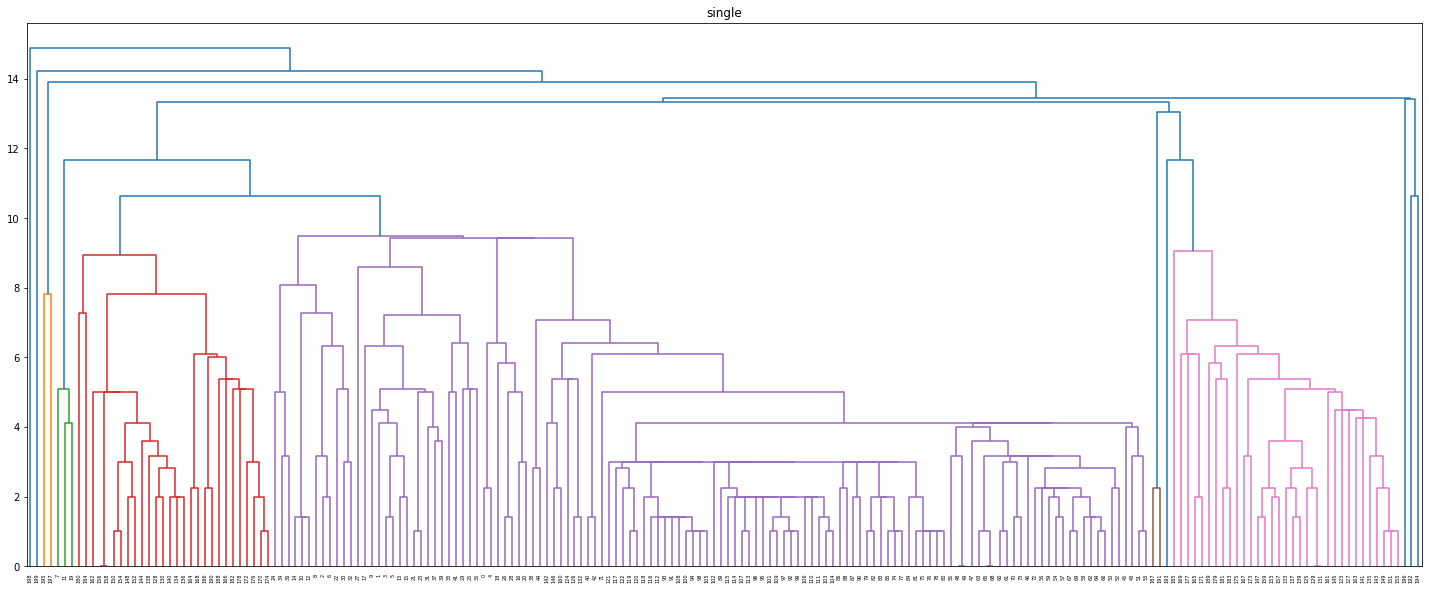

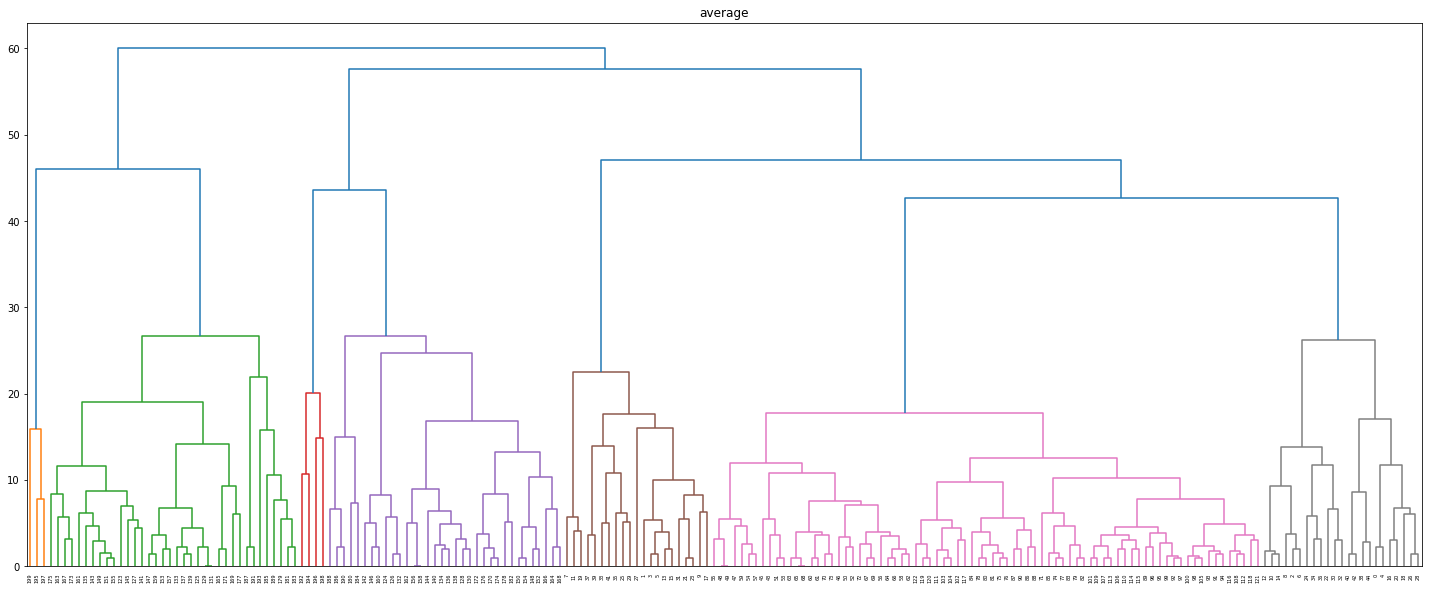

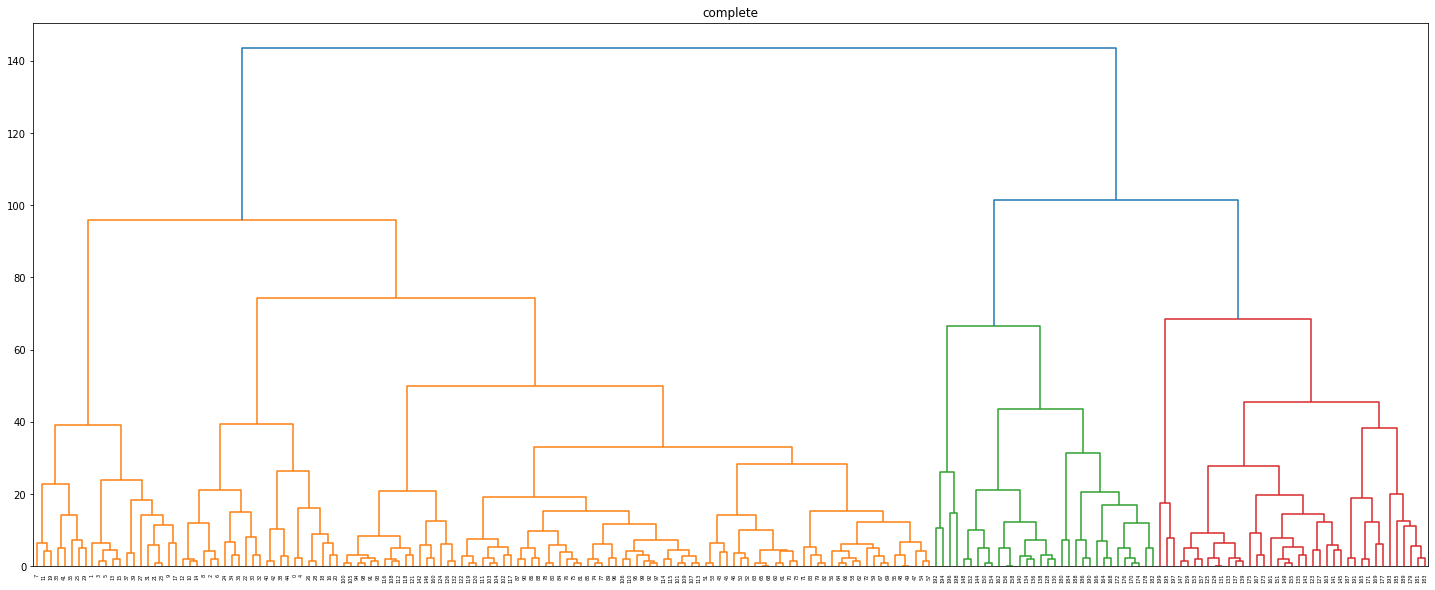

In [178]:
linkage_values=['single','average','complete','ward']
for linkage_value in linkage_values:
    Z = linkage(df,linkage_value)
    plt.figure(figsize=(25, 10))
    plt.title(linkage_value)
    dn = dendrogram(Z)

Ex.4.Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

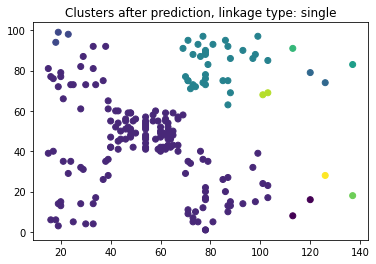

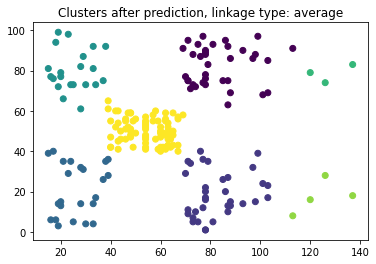

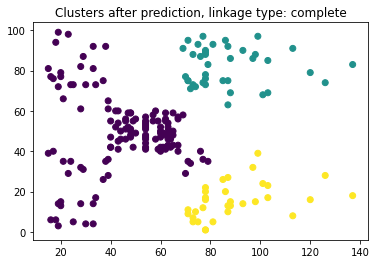

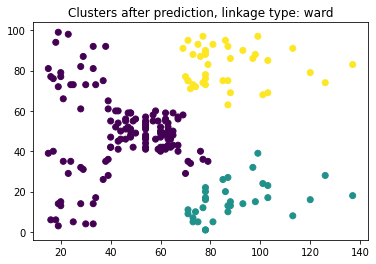

In [ ]:
from sklearn.cluster import AgglomerativeClustering
values=[('single',10),('average',7),('complete',3),('ward',3)]
for linkage_value,cluster_nr in values:
    model=AgglomerativeClustering(n_clusters=cluster_nr,linkage=linkage_value)
    model.fit(df)
    y_pred=model.fit_predict(df)
    plt.figure()
    plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=y_pred)
    plt.title(f'Clusters after prediction, linkage type: {linkage_value}')
    

Selecting the number of clusters with silhouette analysis on KMeans clustering

Ex.1 Create the dataset:

In [ ]:
X, y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0, 10.0),shuffle=True,random_state=1) 

Ex.2 Determine the cluster range [2,3….] and iterate for all the values in cluster range.

silhouette score for cluster_nr: 2 equals: 0.7049787496083262


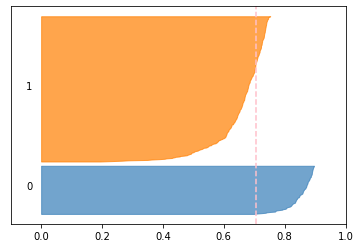

silhouette score for cluster_nr: 3 equals: 0.5882004012129721


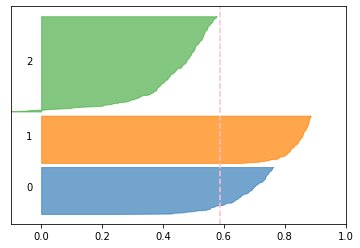

silhouette score for cluster_nr: 4 equals: 0.6505186632729437


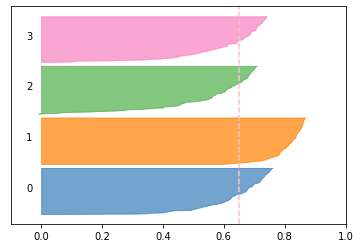

silhouette score for cluster_nr: 5 equals: 0.5743946554642042


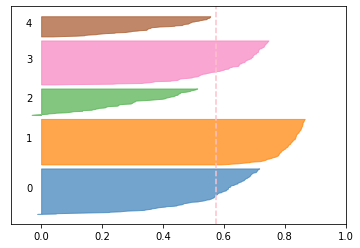

silhouette score for cluster_nr: 6 equals: 0.45616156304581457


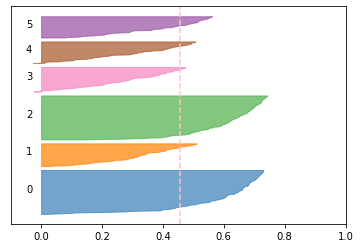

silhouette score for cluster_nr: 7 equals: 0.37260922314630474


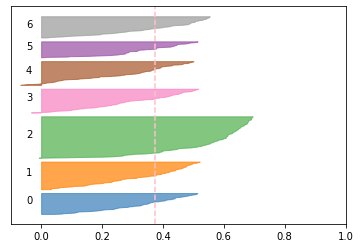

In [ ]:
from sklearn.metrics import silhouette_score as s_score
from sklearn.metrics import silhouette_samples as s_samp
import matplotlib.pyplot as plt
import numpy as np 
colors=["#377eb8",
        "#ff7f00",
        "#4daf4a",
        "#f781bf",
        "#a65628",
        "#984ea3",
        "#999999",]
for cluster_nr in range(2,8):
    km =KMeans(n_clusters=cluster_nr,init='k-means++')
    y_pred=km.fit_predict(X)
    sl_score=s_score(X,y_pred)
    print(f'silhouette score for cluster_nr: {cluster_nr} equals: {sl_score}')
    samples=s_samp(X,y_pred)
    y_lower=10
    fig, ax = plt.subplots()
    for nr in range(cluster_nr):
        clusters=samples[y_pred==nr]
        clusters.sort()
        size_cluster_i = clusters.shape[0]
        y_upper = y_lower + size_cluster_i
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            clusters,
            facecolor=colors[nr],
            edgecolor=colors[nr],
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(nr))
        y_lower = y_upper + 10 

    plt.axvline(sl_score,color="#ffc0cb",linestyle = '--')
    plt.yticks([])
    plt.xlim([-0.1,1])
    plt.show()


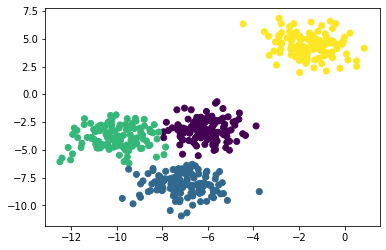

In [ ]:
#k=4
model = KMeans(4,init='random')
model.fit(X)
y_pred = model.predict(X)
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.show()

DBSCAN - density based clusterring


A density based alghorithm has saveral advantages:

It does not require the number of clusters
It can detect outliers - points from outside of any clusters
It can solve all the various shapes and sizes.
However, it is pretty slow and requires a cerefull parameter selection.

Ex. Compare DBSCAN algorithm with k-means on the moon dataset.

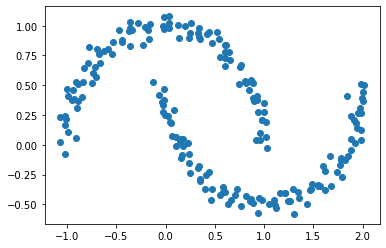

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

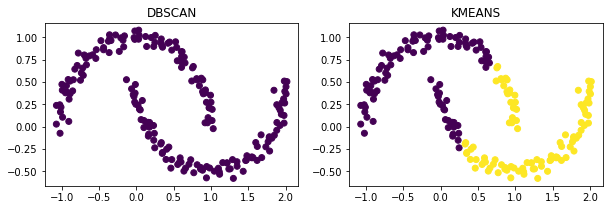

In [ ]:
from sklearn.cluster import DBSCAN

db_model=DBSCAN(eps=0.4)
db_model.fit(x)
db_pred=db_model.fit_predict(x)
km_model=KMeans(n_clusters=2,init='random')
km_model.fit(x)
km_pred=km_model.fit_predict(x)
fig, ax= plt.subplots(1,2)
fig.set_size_inches(10, 3)
ax[0].scatter(x[:,0],x[:,1],c=db_pred)
ax[0].set_title("DBSCAN")
ax[1].scatter(x[:,0],x[:,1],c=km_pred)
ax[1].set_title("KMEANS")
plt.show()